<a href="https://colab.research.google.com/github/MORO-66t/Alphabet-Classification-Description/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_data = pd.read_csv(r"/content/drive/MyDrive/Deep_Learning_Project/Data/emnist-letters-test.csv", header=None)
train_data = pd.read_csv(r"/content/drive/MyDrive/Deep_Learning_Project/Data/emnist-letters-train.csv", header=None)

In [ ]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [ ]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(88800, 785)

In [ ]:
test_data.shape

(14800, 785)

In [ ]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [ ]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train_raw = train_data['label'].values

print("Features shape:", X_train.shape)
print("Labels shape:", y_train_raw.shape)


Features shape: (88800, 784)
Labels shape: (88800,)


In [ ]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test_raw = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test_raw.shape)


Features shape: (14800, 784)
Labels shape: (14800,)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

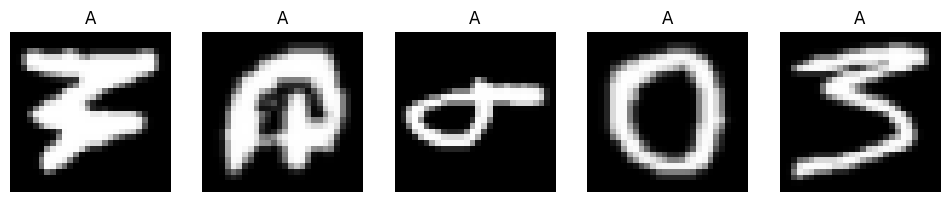

In [ ]:
show_samples(X_train, y_train_raw, n=5)

In [ ]:
# X_train = np.transpose(X_train, (0, 2, 1, 3))
# X_train = np.flip(X_train, axis=2)

# X_test = np.transpose(X_test, (0, 2, 1, 3))
# X_test = np.flip(X_test, axis=2)

In [ ]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One Hot Encoding

In [ ]:
y_train = to_categorical(y_train_raw - 1, num_classes=26)
y_test  = to_categorical(y_test_raw - 1, num_classes=26)

# Shuffling the training dataset

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (79920, 28, 28, 1) (79920, 26)
Validation set: (8880, 28, 28, 1) (8880, 26)


# Visualizing sum samples

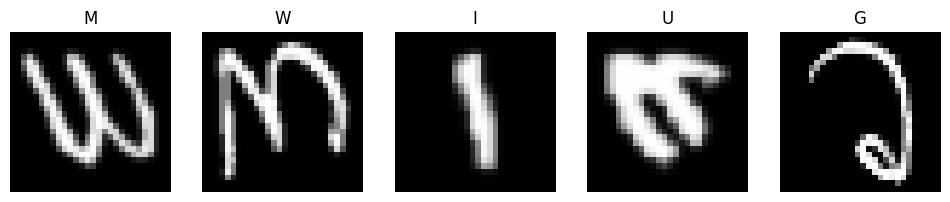

In [ ]:
show_samples(X_train, y_train, n=5)

# Initialize the model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True
    )
]


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7754 - loss: 0.7694 - val_accuracy: 0.9143 - val_loss: 0.2361
Epoch 2/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9260 - loss: 0.2249 - val_accuracy: 0.9303 - val_loss: 0.1915
Epoch 3/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9346 - loss: 0.1916 - val_accuracy: 0.9328 - val_loss: 0.1933
Epoch 4/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9412 - loss: 0.1709 - val_accuracy: 0.9377 - val_loss: 0.1757
Epoch 5/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9441 - loss: 0.1573 - val_accuracy: 0.9355 - val_loss: 0.1903
Epoch 6/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9483 - loss: 0.1429 - val_accuracy: 0.9446 - val_loss: 0.1602
Epoch 7/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9527 - loss: 0.1263 - val_accuracy: 0.9426 - val_loss: 0.1775
Epoch 8/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9555 - loss: 0

In [ ]:
# save final model
model.save('final_emnist_vgg.h5')

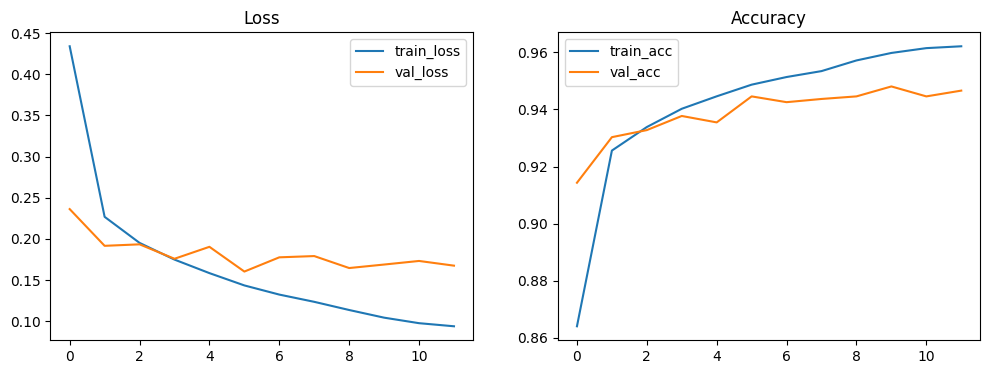

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_acc)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9460 - loss: 0.1881
Final Test Loss: 0.19869796931743622
Final Test Accuracy: 0.9358108043670654


463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


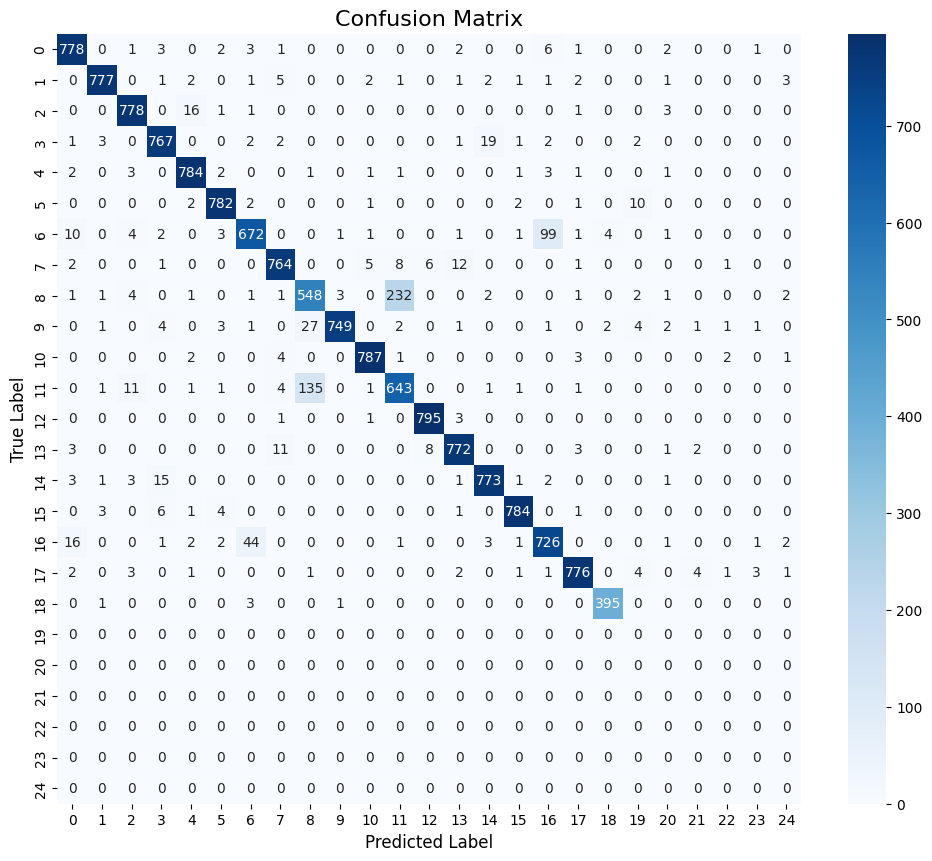

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Show some misclassified examples

Number of misclassified: 950


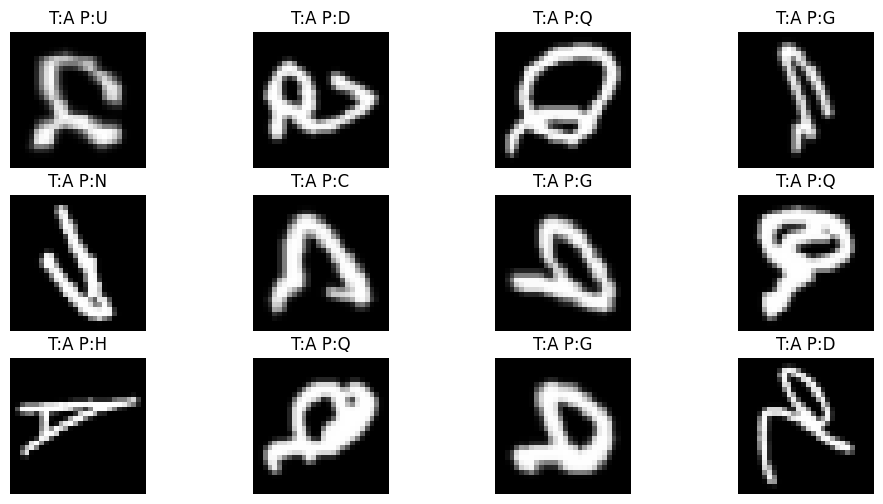

In [ ]:
mis_idx = np.where(y_pred != y_true)[0]
print('Number of misclassified:', len(mis_idx))


n_show = min(12, len(mis_idx))
plt.figure(figsize=(12,6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28).T, cmap='gray')
    # plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f'T:{chr(ord("A")+y_true[idx])} P:{chr(ord("A")+y_pred[idx])}')
    plt.axis('off')
plt.show()

# After optimizing some misclassified examples

Total misclassified: 950


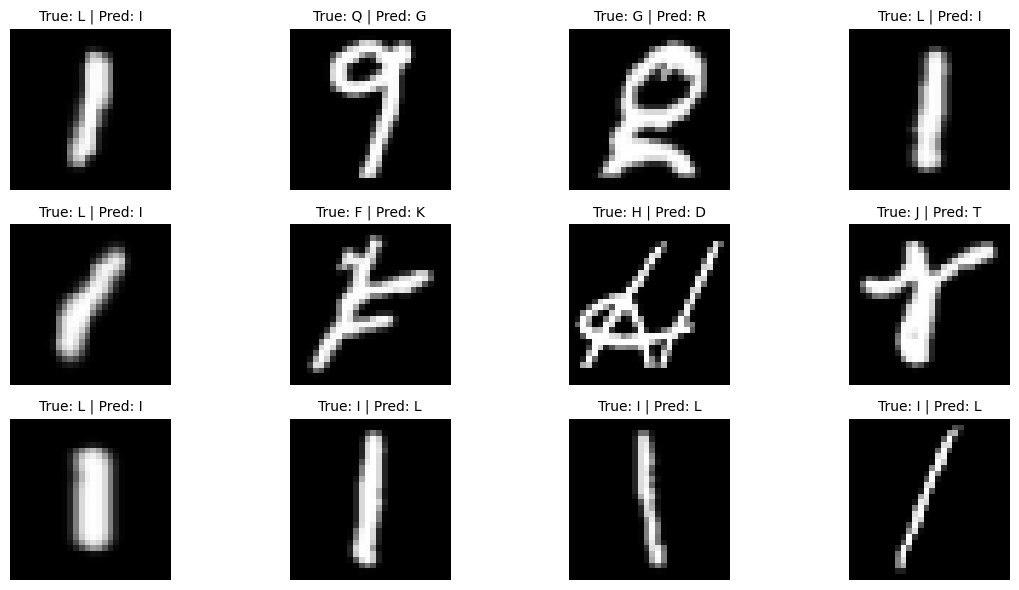

In [ ]:
mis_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(mis_idx)

print(f'Total misclassified: {len(mis_idx)}')
n_show = min(12, len(mis_idx))
plt.figure(figsize=(12, 6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i + 1)
    img = X_test[idx].reshape(28, 28)
    img = np.rot90(img.T, k=1)
    plt.imshow(img, cmap='gray')

    true_char = chr(ord("A") + y_true[idx])
    pred_char = chr(ord("A") + y_pred[idx])

    plt.title(f'True: {true_char} | Pred: {pred_char}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# This indicates that about 5% of EMNIST letters dataset looks like the messy examples above.

#MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input

In [ ]:
# Build MobileNet Model

def build_mobilenet_model(input_shape=(28, 28, 1), num_classes=26):
    inputs = Input(shape=input_shape)

    x = layers.Resizing(32, 32)(inputs)

    x = layers.Conv2D(3, (3, 3), padding='same')(x)

    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3)
    )

    base_model.trainable = True

    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="MobileNet_Custom")
    return model

model = build_mobilenet_model()

/tmp/ipython-input-3242291643.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:
# Compile & Train

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Low LR for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, monitor='val_loss')
]
print(model.summary())

Model: "MobileNet_Custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │        33,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,320 (8.74 MB)

 Trainable params: 2,257,208 (8.61 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 93s 39ms/step - accuracy: 0.4168 - loss: 2.1844 - val_accuracy: 0.2118 - val_loss: 2.8442 - learning_rate: 1.0000e-04
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8329 - loss: 0.5325 - val_accuracy: 0.7757 - val_loss: 1.1599 - learning_rate: 1.0000e-04
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8874 - loss: 0.3445 - val_accuracy: 0.8974 - val_loss: 0.3348 - learning_rate: 1.0000e-04
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9108 - loss: 0.2628 - val_accuracy: 0.9203 - val_loss: 0.2326 - learning_rate: 1.0000e-04
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9192 - loss: 0.2385 - val_accuracy: 0.9227 - val_loss: 0.2216 - learning_rate: 1.0000e-04
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9280 - loss: 0.2069 - val_accuracy: 0.9256 - val_loss: 0.2307 - learning_rate: 1.0000e-04
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9425 - loss: 0.2038
Test accuracy: 0.9330


In [ ]:
# from sklearn.metrics import classification_report

# report = classification_report(y_true, y_pred, target_names=columns_names)
# print("Classification Report:\n")
# print(report)

ValueError: Number of classes, 25, does not match size of target_names, 785. Try specifying the labels parameter

In [ ]:
unique_labels, counts = np.unique(y_test_raw, return_counts=True)
print("Unique labels in test set:", unique_labels)
print("Counts of each label:", dict(zip(unique_labels, counts)))

Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counts of each label: {np.int64(1): np.int64(800), np.int64(2): np.int64(800), np.int64(3): np.int64(800), np.int64(4): np.int64(800), np.int64(5): np.int64(800), np.int64(6): np.int64(800), np.int64(7): np.int64(800), np.int64(8): np.int64(800), np.int64(9): np.int64(800), np.int64(10): np.int64(800), np.int64(11): np.int64(800), np.int64(12): np.int64(800), np.int64(13): np.int64(800), np.int64(14): np.int64(800), np.int64(15): np.int64(800), np.int64(16): np.int64(800), np.int64(17): np.int64(800), np.int64(18): np.int64(800), np.int64(19): np.int64(400)}


Observation:
The test dataset used for evaluation is incomplete. It only contains samples for the first 19 classes (labels 1 to 19, corresponding to letters A through S).

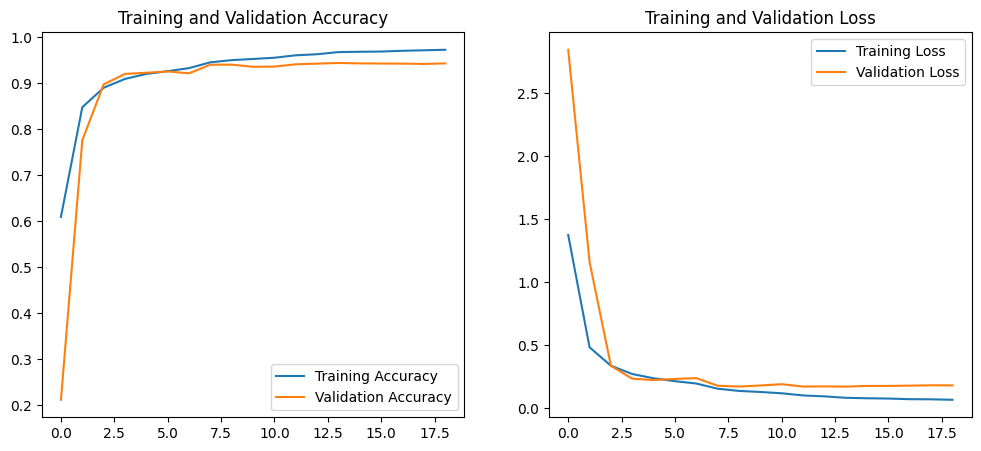

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

463/463 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


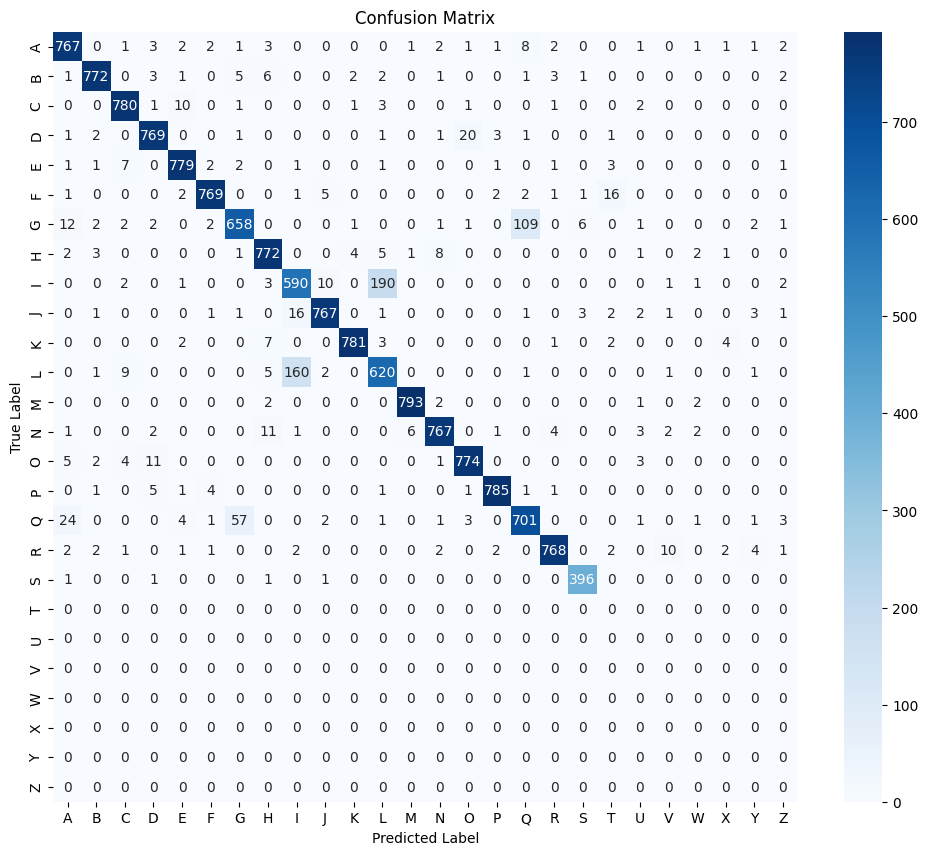

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
class_names = [chr(ord('A') + i) for i in range(26)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

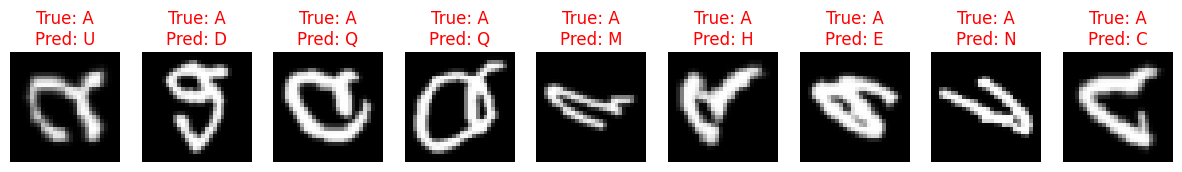

In [ ]:
incorrect_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 5))
for i, incorrect_idx in enumerate(incorrect_indices[:9]):
    ax = plt.subplot(1, 9, i + 1)
    plt.imshow(X_test[incorrect_idx].squeeze(), cmap='gray')
    true_label = chr(ord('A') + y_true[incorrect_idx])
    pred_label = chr(ord('A') + y_pred[incorrect_idx])
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1249 ━━━━━━━━━━━━━━━━━━━━ 92s 50ms/step - accuracy: 0.9143 - loss: 0.2753 - val_accuracy: 0.9402 - val_loss: 0.1734 - learning_rate: 3.1250e-06
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9212 - loss: 0.2317 - val_accuracy: 0.9396 - val_loss: 0.1764 - learning_rate: 3.1250e-06
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9249 - loss: 0.2140 - val_accuracy: 0.9386 - val_loss: 0.1756 - learning_rate: 3.1250e-06
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9274 - loss: 0.2127 - val_accuracy: 0.9390 - val_loss: 0.1744 - learning_rate: 1.5625e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9276 - loss: 0.2089 - val_accuracy: 0.9395 - val_loss: 0.1730 - learning_rate: 1.5625e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9296 - loss: 0.2032 - val_accuracy: 0.9393 - val_loss: 0.1718 - learning_rate: 1.5625e-06


In [ ]:
for layer in model.layers[-40:]:
    if hasattr(layer, "trainable"):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nFine-Tuning started...\n")

history_ft = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)


Fine-Tuning started...

Epoch 1/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 113s 26ms/step - accuracy: 0.9531 - loss: 0.1199 - val_accuracy: 0.9437 - val_loss: 0.1672 - learning_rate: 1.0000e-05
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9557 - loss: 0.1163 - val_accuracy: 0.9427 - val_loss: 0.1712 - learning_rate: 1.0000e-05
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.9565 - loss: 0.1134 - val_accuracy: 0.9420 - val_loss: 0.1698 - learning_rate: 1.0000e-05
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.9591 - loss: 0.1073 - val_accuracy: 0.9427 - val_loss: 0.1708 - learning_rate: 5.0000e-06
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9588 - loss: 0.1047 - val_accuracy: 0.9444 - val_loss: 0.1713 - learning_rate: 5.0000e-06
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.9596 - loss: 0.1039 - val_accuracy: 0.9446 - val_loss: 0.1703 - learning_rate: 2.5000e-06
Epoch 7/10
249

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1
)

datagen.fit(X_train)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9490 - loss: 0.1373 - val_accuracy: 0.9420 - val_loss: 0.1735 - learning_rate: 6.2500e-07
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9488 - loss: 0.1405 - val_accuracy: 0.9414 - val_loss: 0.1771 - learning_rate: 6.2500e-07
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9488 - loss: 0.1369 - val_accuracy: 0.9409 - val_loss: 0.1778 - learning_rate: 6.2500e-07
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9487 - loss: 0.1379 - val_accuracy: 0.9404 - val_loss: 0.1782 - learning_rate: 3.1250e-07
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9482 - loss: 0.1395 - val_accuracy: 0.9400 - val_loss: 0.1782 - learning_rate: 3.1250e-07
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9497 - loss: 0.1360 - val_accuracy: 0.9402 - val_loss: 0.1779 - learning_rate: 1.5625e-07


In [ ]:
# Resize to 224x224x3 for ResNet
def preprocess_image_for_resnet(image, label):
    # Ensure image is float32 for resizing
    image = tf.cast(image, tf.float32)

    # Resize image to (224, 224)
    image = tf.image.resize(image, (28, 28))

    # Convert grayscale (1 channel) to RGB (3 channels)
    image = tf.image.grayscale_to_rgb(image)

    return image, label

# Define the batch size
BATCH_SIZE = 64

# Create tf.data.Dataset objects for training, validation, and testing
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .map(preprocess_image_for_resnet, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(buffer_size=1000) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .map(preprocess_image_for_resnet, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .map(preprocess_image_for_resnet, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

print("Created tf.data.Dataset objects for train, validation, and test.")
print("These datasets will preprocess images on the fly, avoiding OOM errors.")
print("You will need to use 'train_dataset', 'val_dataset', and 'test_dataset' in your model fitting and evaluation steps.")

NameError: name 'tf' is not defined

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,118,938 (92.01 MB)

 Trainable params: 24,065,818 (91.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
history = model.fit(
    train_dataset, # Use the preprocessed train_dataset
    validation_data=val_dataset, # Use the preprocessed val_dataset
    epochs=10,
   	batch_size=64
)

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2409s 2s/step - accuracy: 0.5228 - loss: 1.6285 - val_accuracy: 0.7765 - val_loss: 0.8085
Epoch 2/10
 135/1249 ━━━━━━━━━━━━━━━━━━━━ 1:15:26 4s/step - accuracy: 0.8486 - loss: 0.4761